In [1]:
from scripts.halo_analysis_scripts import *
from scripts.analytic_modeling import Simulation
from astropy import units as un, constants as cons
from joblib import Parallel, delayed
import matplotlib.colors as colors
%matplotlib inline
plt.style.reload_library()
plt.style.use(['science', 'high-vis'])
import smplotlib

Bad value in file '/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/smplotlib/smplot.mplstyle', line 617 ("hist.bins: 'auto'  # The default number of histogram bins or 'auto'."): Key hist.bins: 'hist.bins' must be one of ['auto', 'sturges', 'fd', 'doane', 'scott', 'rice', 'sqrt'], an int or a sequence of floats


In [2]:
def findclosestsnapnum(simname, z):
    return np.argmin(np.abs(redshifts_snapshots(sim_path_fire3(simname)) - z))

In [3]:
def findsnapnumrange(simname, z0, z1):
    zs = redshifts_snapshots( sim_path_fire3(simname) )
    s0 = np.argmin(np.abs(zs - z0))
    s1 = np.argmin(np.abs(zs - z1))
    return np.arange(s1, s0+1)

In [4]:
# def make_PaperSimNames(sims=['m12f', 'm12q', 'm13h029', 'm13h113', 'm13h206'], 
#                        zfn=lambda sim: 0 if sim=='m12f' else 1):
def make_PaperSimNames(sims=['m12f', 'm12q', 'm13h113', 'm13h206'], 
                       zfn=lambda sim: 0.3):
    PaperSimNames = {}
    PaperSnapNums = {}
    for sim in sims:
        # print(np.array([k for k in cache.keys() if sim in k]))
        res = np.array([k for k in cache.keys() if sim in k])
        
        NoBH = [k for k in res if 'sdp1e10' in k][0]
        res = list(set(res) - set([NoBH]))
        BHCR = [k for k in res if 'crdiffc1' in k][0]
        BH = list(set(res) - set([BHCR]))[0]

        PaperSimNames[f'{sim}_NoBH'] = NoBH
        PaperSimNames[f'{sim}_BH'] = BH
        PaperSimNames[f'{sim}_BHCR'] = BHCR
        
        PaperSnapNums[f'{sim}_NoBH'] = findclosestsnapnum(NoBH, zfn(sim))
        PaperSnapNums[f'{sim}_BH'] = findclosestsnapnum(BH, zfn(sim))
        PaperSnapNums[f'{sim}_BHCR'] = findclosestsnapnum(BHCR, zfn(sim))
    return PaperSimNames, PaperSnapNums
PaperSimNames, PaperSnapNums = make_PaperSimNames()

In [8]:
PaperSimNames['m12f_BHCR']
res_par = Parallel(n_jobs=15, verbose=10)(delayed(Simulation)(sim_path_fire3(PaperSimNames['m12f_BHCR']), s) for s in range(45,61))

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   3 out of  16 | elapsed:   17.2s remaining:  1.2min
[Parallel(n_jobs=15)]: Done   5 out of  16 | elapsed:   17.2s remaining:   37.9s
[Parallel(n_jobs=15)]: Done   7 out of  16 | elapsed:   17.2s remaining:   22.2s
[Parallel(n_jobs=15)]: Done   9 out of  16 | elapsed:   17.2s remaining:   13.4s
[Parallel(n_jobs=15)]: Done  11 out of  16 | elapsed:   17.3s remaining:    7.8s
[Parallel(n_jobs=15)]: Done  13 out of  16 | elapsed:   17.3s remaining:    4.0s
[Parallel(n_jobs=15)]: Done  16 out of  16 | elapsed:   17.4s finished


In [59]:
snaps = sorted([int(f.split('_')[-1].split('.')[0]) for f in os.listdir('../data/simcache') if PaperSimNames['m12f_NoBH'] in f])
res_par_NoBH = Parallel(n_jobs=15, verbose=10)(delayed(Simulation)(sim_path_fire3(PaperSimNames['m12f_NoBH']), s) for s in snaps)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:   19.5s
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   19.5s
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   19.7s
[Parallel(n_jobs=15)]: Done  31 tasks      | elapsed:   19.8s
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:   19.9s
[Parallel(n_jobs=15)]: Done  55 tasks      | elapsed:   20.0s
[Parallel(n_jobs=15)]: Batch computation too fast (0.1992s.) Setting batch_size=2.
[Parallel(n_jobs=15)]: Done  68 tasks      | elapsed:   20.0s
[Parallel(n_jobs=15)]: Done  83 tasks      | elapsed:   20.4s
[Parallel(n_jobs=15)]: Done  98 tasks      | elapsed:   20.5s
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=15)]: Done 119 out of 165 | elapsed:   20.7s remaining:    8.0s
/work2/08044

In [67]:
snaps = sorted([int(f.split('_')[-1].split('.')[0]) for f in os.listdir('../data/simcache') if PaperSimNames['m12f_BH'] in f])
res_par_BH = Parallel(n_jobs=15, verbose=10)(delayed(Simulation)(sim_path_fire3(PaperSimNames['m12f_BH']), s) for s in snaps)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=15)]: Done  31 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=15)]: Done  55 tasks      | elapsed:    0.7s
[Parallel(n_jobs=15)]: Batch computation too fast (0.1999s.) Setting batch_size=2.
[Parallel(n_jobs=15)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=15)]: Done  83 tasks      | elapsed:    0.9s
[Parallel(n_jobs=15)]: Done 106 tasks      | elapsed:    1.1s
[Parallel(n_jobs=15)]: Done 140 tasks      | elapsed:    1.3s
[Parallel(n_jobs=15)]: Done 174 tasks      | elapsed:    1.5s
[Parallel(n_jobs=15)]: Done 232 out of 237 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=15)]: Done 237 out of 237 | elapsed:    2.0s finished


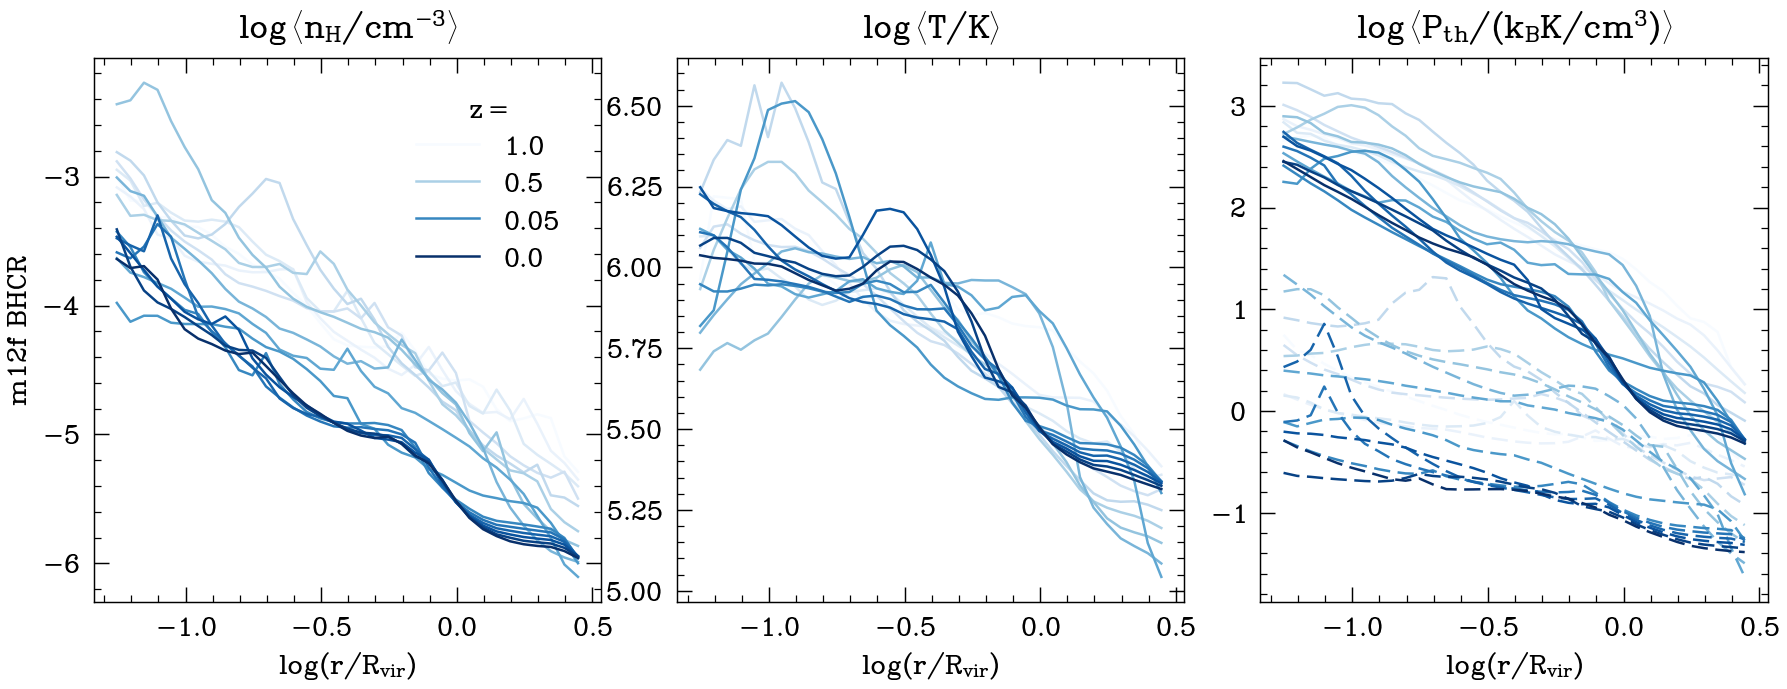

In [50]:
colors = plt.cm.Blues(np.linspace(0,1,len(res_par)))
fig, axes = plt.subplots(1, 3, sharex=True, sharey='col', gridspec_kw={'wspace': .15, 'hspace':.05}, figsize=[4.8*3,4.8*1], dpi=150)
for i,Sim in enumerate(res_par):
    mask = Sim.pro['rmid'] > 0.05
    axes[0].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['nH'][mask], '-', c=colors[i], label=np.around(Sim.Redshift[()], 2) if i%5==0 else None)
    axes[1].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['T'][mask], '-', c=colors[i])
    axes[2].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['P_th'][mask], '-', c=colors[i])
    axes[2].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['P_CR'][mask], '--', c=colors[i])

    axes[0].set_title(profilelabels['nH lin'])
    axes[1].set_title(profilelabels['T lin'])
    axes[2].set_title(profilelabels['P_th lin'])
for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
axes[0].set_ylabel('m12f BHCR')
axes[0].legend(title='$z=$')

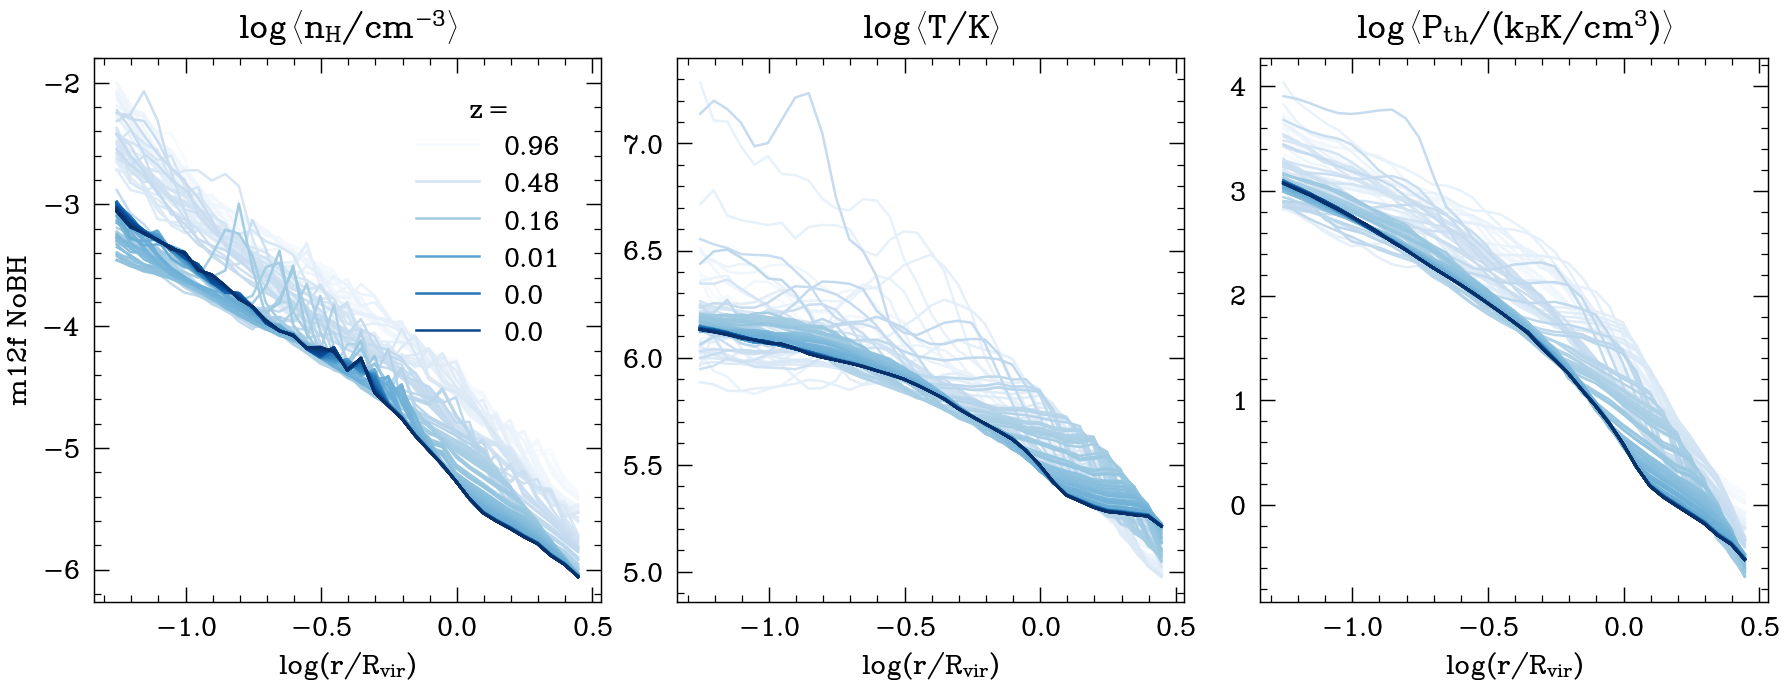

In [65]:
colors = plt.cm.Blues(np.linspace(0,1,len(res_par_NoBH)))
fig, axes = plt.subplots(1, 3, sharex=True, sharey='col', gridspec_kw={'wspace': .15, 'hspace':.05}, figsize=[4.8*3,4.8*1], dpi=150)
for i,Sim in enumerate(res_par_NoBH):
    mask = Sim.pro['rmid'] > 0.05
    axes[0].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['nH'][mask], '-', c=colors[i], label=np.around(Sim.Redshift[()], 2) if i%30==0 else None)
    axes[1].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['T'][mask], '-', c=colors[i])
    axes[2].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['P_th'][mask], '-', c=colors[i])
    # axes[2].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['P_CR'][mask], '--', c=colors[i])

    axes[0].set_title(profilelabels['nH lin'])
    axes[1].set_title(profilelabels['T lin'])
    axes[2].set_title(profilelabels['P_th lin'])
for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
axes[0].set_ylabel('m12f NoBH')
axes[0].legend(title='$z=$')

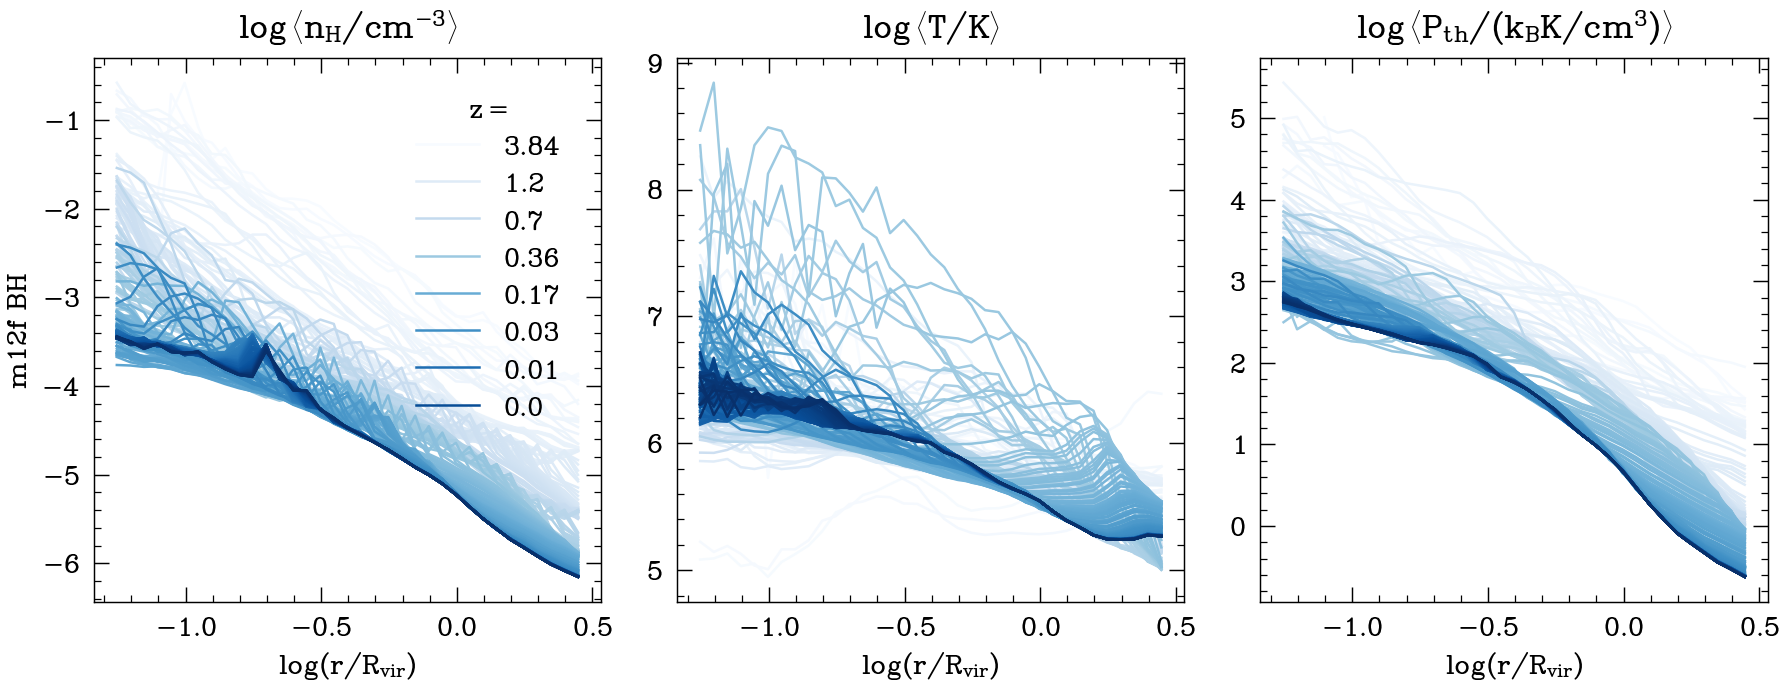

In [68]:
colors = plt.cm.Blues(np.linspace(0,1,len(res_par_BH)))
fig, axes = plt.subplots(1, 3, sharex=True, sharey='col', gridspec_kw={'wspace': .15, 'hspace':.05}, figsize=[4.8*3,4.8*1], dpi=150)
for i,Sim in enumerate(res_par_BH):
    mask = Sim.pro['rmid'] > 0.05
    axes[0].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['nH'][mask], '-', c=colors[i], label=np.around(Sim.Redshift[()], 2) if i%30==0 else None)
    axes[1].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['T'][mask], '-', c=colors[i])
    axes[2].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['P_th'][mask], '-', c=colors[i])
    # axes[2].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['P_CR'][mask], '--', c=colors[i])

    axes[0].set_title(profilelabels['nH lin'])
    axes[1].set_title(profilelabels['T lin'])
    axes[2].set_title(profilelabels['P_th lin'])
for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
axes[0].set_ylabel('m12f BH')
axes[0].legend(title='$z=$')

In [15]:
res_par = {}
for k in sorted(PaperSimNames.keys()):
    if 'BHCR' in k:
        snaps = sorted([int(f.split('_')[-1].split('.')[0]) for f in os.listdir('../data/simcache') if PaperSimNames[k] in f])
        print(k,snaps)
        res_par[k] = Parallel(n_jobs=-1, verbose=10)(delayed(Simulation)(sim_path_fire3(PaperSimNames[k]), s) for s in snaps)

m12f_BHCR [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  46 | elapsed:  1.0min remaining: 15.0min
[Parallel(n_jobs=-1)]: Done   8 out of  46 | elapsed:  1.1min remaining:  5.0min
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=-1)]: Done  13 out of  46 | elapsed:  1.1min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  18 out of  46 | elapsed:  1.1min remaining:  1.7min
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=-1)]: Done  23 out of  46 | elapsed:  1.1min remaining:  1.1min
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  

m12q_BHCR [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


[Parallel(n_jobs=-1)]: Done   3 out of  46 | elapsed:   46.2s remaining: 11.0min
[Parallel(n_jobs=-1)]: Done   8 out of  46 | elapsed:   46.8s remaining:  3.7min
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=-1)]: Done  13 out of  46 | elapsed:   47.5s remaining:  2.0min
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=-1)]: Done  18 out of  46 | elapsed:   47.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  23 out of  46 | elapsed:   47.7s remaining:   47.7s
[Parallel(n_jobs=-1)]: Done  28 out of  46 | elapsed:   47.8s remaining:   30.8s
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log

m13h113_BHCR [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=-1)]: Done  28 out of  46 | elapsed:   21.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done  33 out of  46 | elapsed:   22.0s remaining:    8.7s
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=-1)]: Done  38 out of  46 | elapsed:   22.2s remaining:    4.7s
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=-1)]: Done  43 out of  46 | elapsed:   22.4s remaining:    1.6s
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: inval

m13h206_BHCR [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


[Parallel(n_jobs=-1)]: Done  43 out of  46 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.2s finished


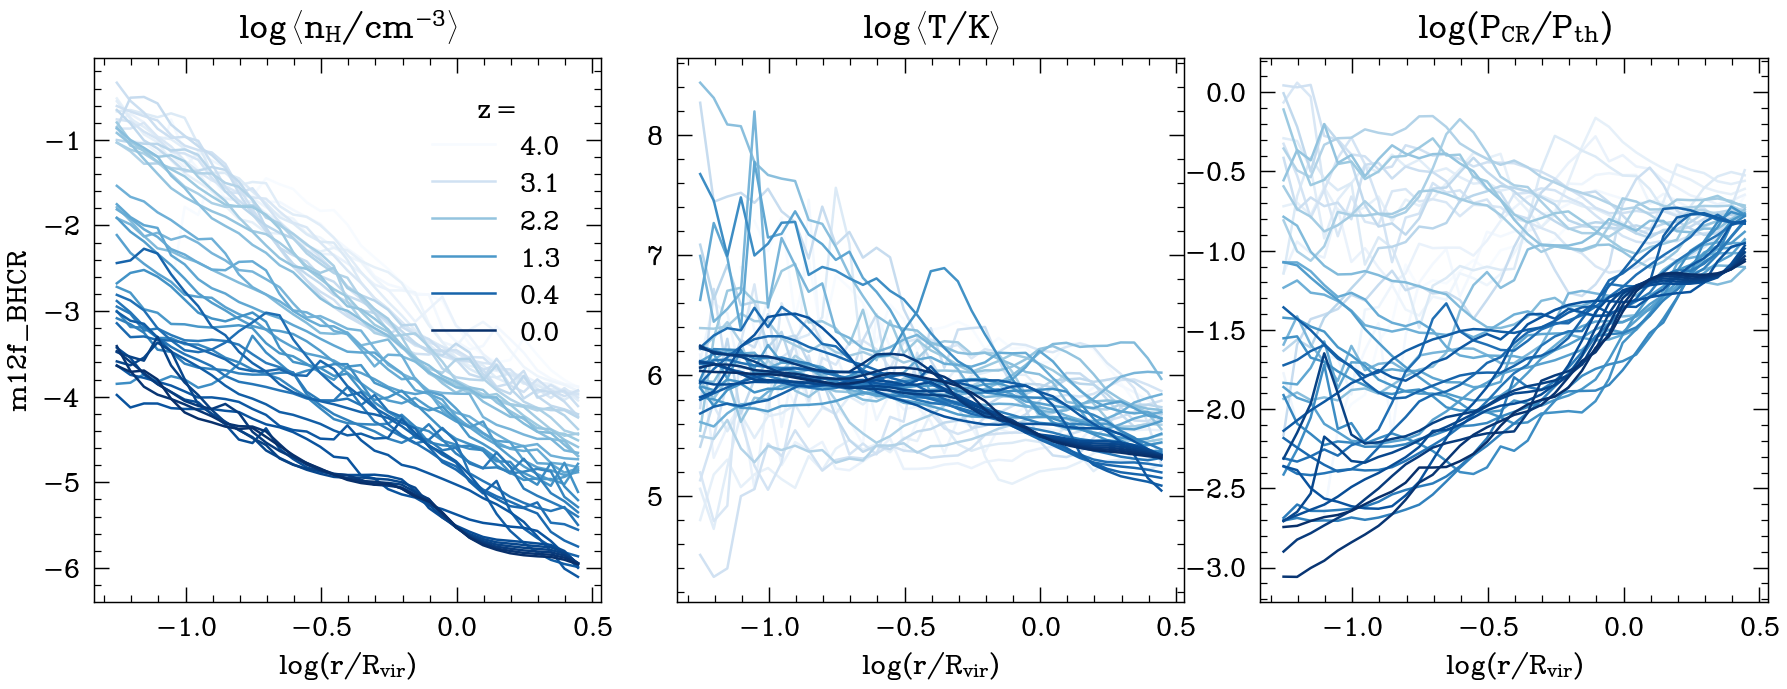

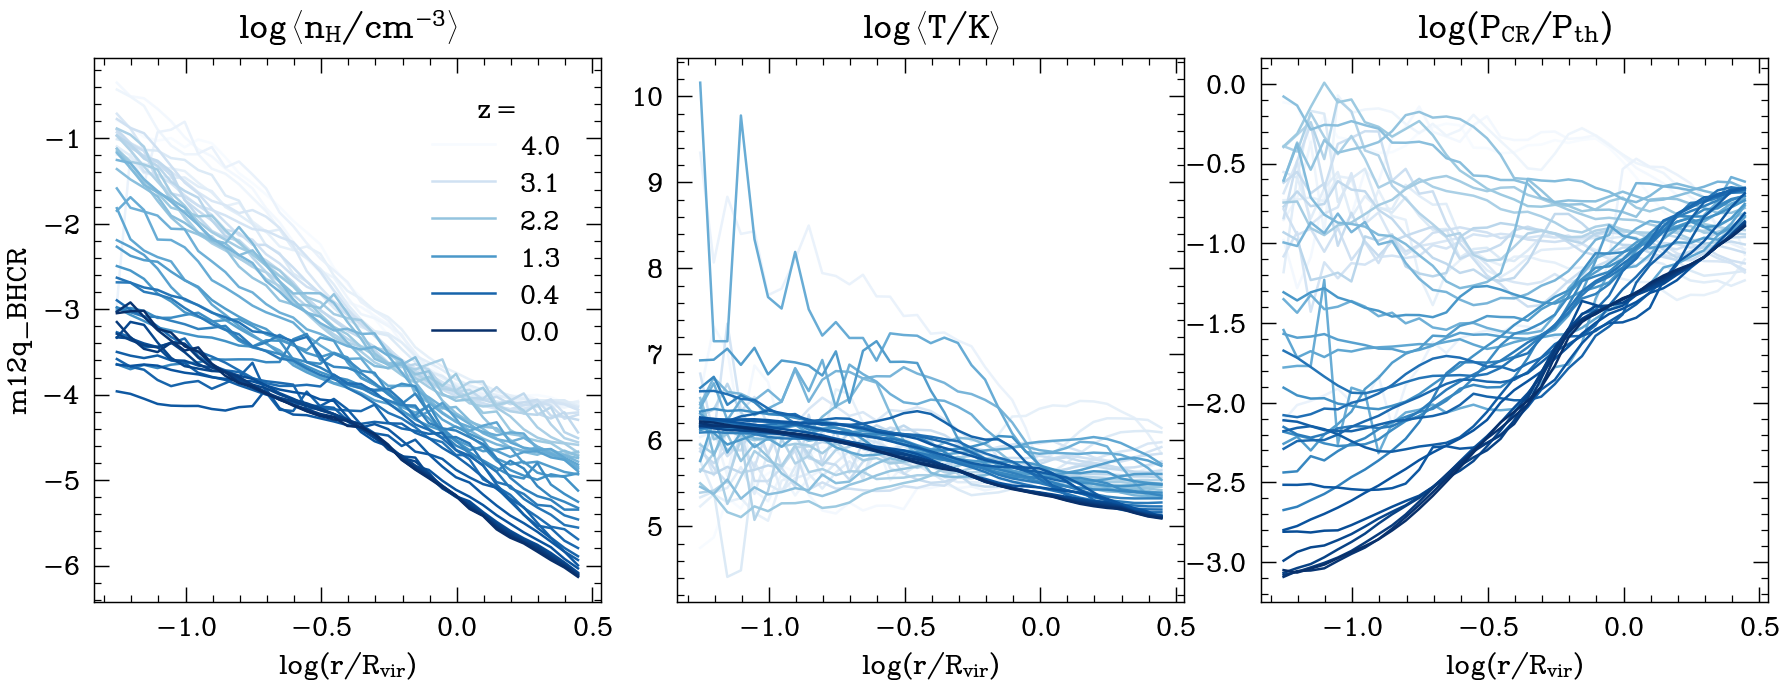

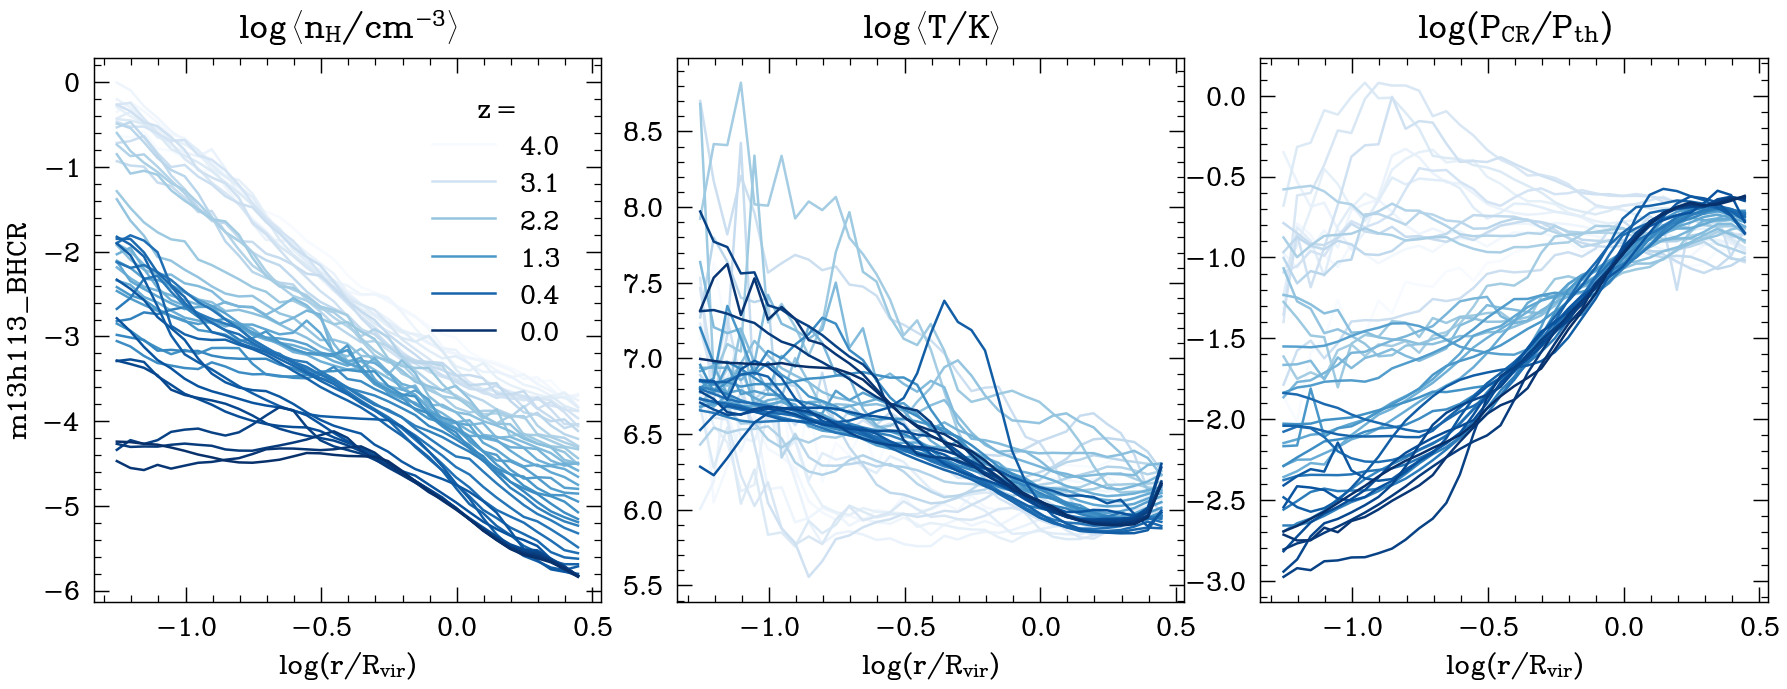

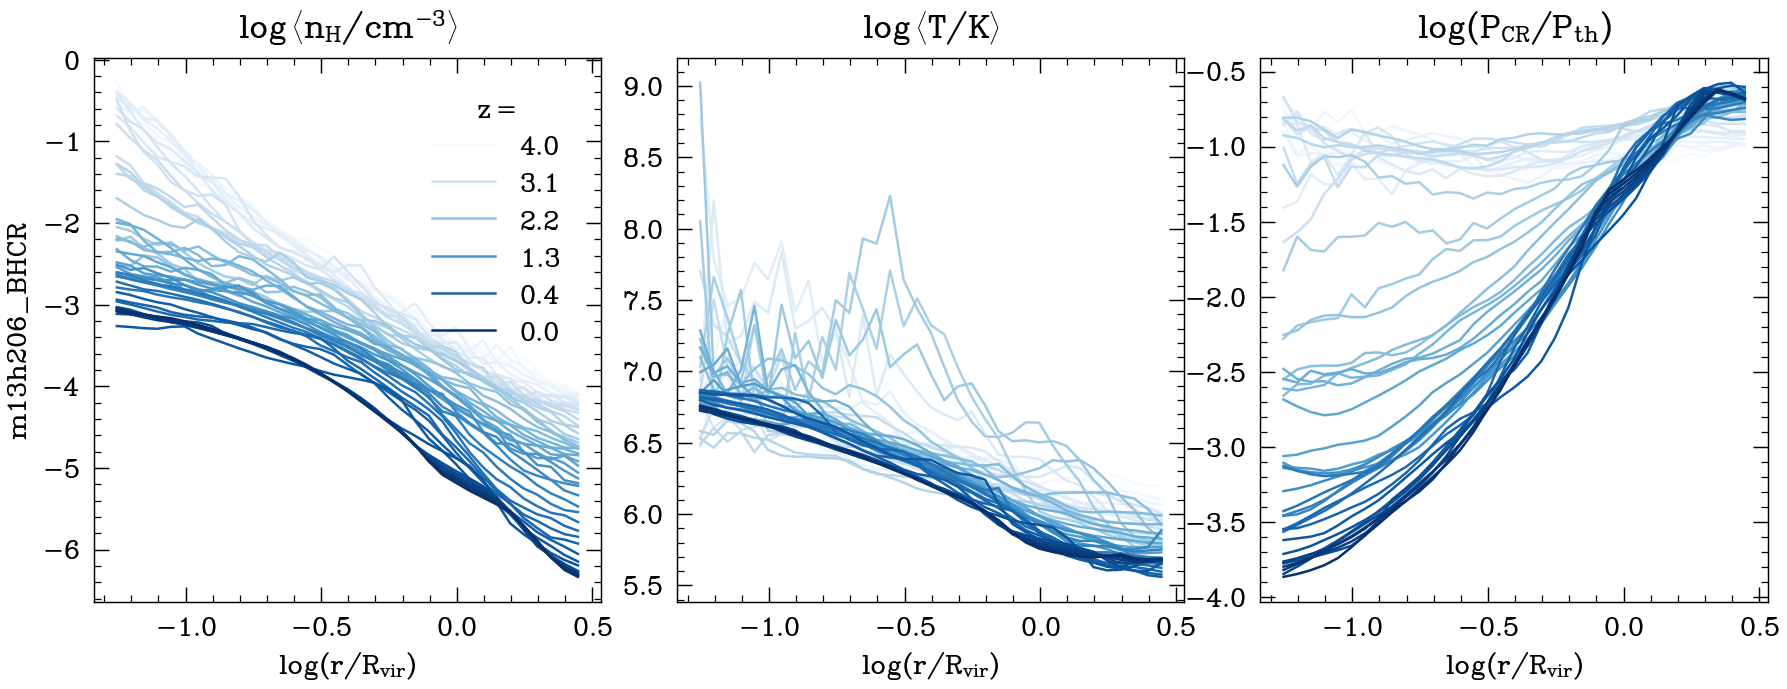

In [47]:
for k in res_par.keys():
    colors = plt.cm.Blues(np.linspace(0,1,len(res_par[k])))
    fig, axes = plt.subplots(1, 3, sharex=True, sharey='col', gridspec_kw={'wspace': .15, 'hspace':.05}, figsize=[4.8*3,4.8*1], dpi=150)
    for i,Sim in enumerate(res_par[k]):
        mask = Sim.pro['rmid'] > 0.05
        axes[0].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['nH'][mask], '-', c=colors[i], label=np.abs(np.around(Sim.Redshift[()], 2)) if i%9==0 else None)
        axes[1].plot(np.log10(Sim.pro['rmid'])[mask], Sim.pro['T'][mask], '-', c=colors[i])
        axes[2].plot(np.log10(Sim.pro['rmid'])[mask], np.log10(np.power(10, Sim.pro['P_CR'][mask]-Sim.pro['P_th'][mask])), '-', c=colors[i])

        axes[0].set_title(profilelabels['nH lin'])
        axes[1].set_title(profilelabels['T lin'])
        axes[2].set_title(r'$\log (P_{CR} / P_{th})$')
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[0].set_ylabel(k)
    axes[0].legend(title='$z=$')
    plt.savefig(f'../Paper2Figs/redshifts_{k}.pdf', bbox_inches='tight')

In [ ]:
res = {}
for k in sorted(PaperSimNames.keys()):
    print(k)
    res[k] = Simulation(sim_path_fire3(PaperSimNames[k]), PaperSnapNums[k])

In [8]:
def cachesnap(simdir, snapnum):
    try:
        Simulation(simdir, snapnum, cachesim=True)
    except:
        print(f'Could not find {snapnum} for {simdir}')
    return 0

for k in sorted(PaperSimNames.keys()):
    if 'BHCR' in k:
        print(k)
        Parallel(n_jobs=-1, verbose=10)(delayed(cachesnap)(sim_path_fire3(PaperSimNames[k]), snapnum) for snapnum in findsnapnumrange(PaperSimNames[k], 0, 4))    

m12f_BHCR


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 112 concurrent workers.
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=d

m12q_BHCR


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packag

m13h113_BHCR


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packag

m13h206_BHCR


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packag

In [53]:
for k in ['m13h113_BH', 'm13h206_BH']:
    Parallel(n_jobs=-1, verbose=10)(delayed(cachesnap)(sim_path_fire3(PaperSimNames[k]), snapnum) for snapnum in findsnapnumrange(PaperSimNames[k], 0, 1))    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0447s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 124 out of 315 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 156 out of 315 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 188 out of 315 | elapsed:    0.2s remaining:    0.2s


Could not find 295 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 384 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 397 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 402 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 410 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 418 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 426 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h

[Parallel(n_jobs=-1)]: Done 220 out of 315 | elapsed: 11.0min remaining:  4.7min


eBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 220 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 224 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 60 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e5/m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 211 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 202 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 242 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 241 for /scratch3/01799/phopkins/f

/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9

Could not find 275 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 443 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 215 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Could not find 264 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 297 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 214 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Could not find 251 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 234 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


Could not find 224 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 370 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 400 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 230 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Could not find 252 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 55 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e5/m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 209 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 285 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 208 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 228 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Could not find 263 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 280 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


Could not find 235 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 246 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 196 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


Could not find 269 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 372 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 218 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9

Could not find 59 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e5/m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 206 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 188 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 274 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 282 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 271 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)


Could not find 274 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 361 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 231 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)


Could not find 195 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Could not find 291 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 309 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 324 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 241 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e4/m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5


/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: invalid value encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered 

Could not find 296 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 298 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 299 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 300 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 301 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 302 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 303 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h

/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Could not find 292 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 282 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 288 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 283 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 289 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 284 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 285 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h

/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9

Could not find 428 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 430 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 432 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 434 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 436 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 438 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 440 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h

/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


Could not find 287 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9

Could not find 194 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 221 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 290 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 218 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 264 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 399 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 416 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep1

/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)


Could not find 266 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 275 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
Could not find 274 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5


/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: invalid value encountered in log10
  if log: Mtest = np.log10(Mtest)
[Parallel(n_jobs=-1)]: Done 252 out of 315 | elapsed: 15.6min remaining:  3.9min


Could not find 278 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5


/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered

Could not find 295 for /scratch3/01799/phopkins/fire3_suite_done/m13h206_m3e4/m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5


/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: invalid value encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: invalid value encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: invalid value encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: invalid value encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: invalid value encountered in log10
  if log: Mtest = np.log10(Mtest)
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:281: RuntimeWarning: divide by zero encountered in l

Could not find 57 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e5/m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 273 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 381 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 429 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 260 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 56 for /scratch3/01799/phopkins/fire3_suite_done/m13h113_m3e5/m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
Could not find 272 for /scratch3/01799/phopkins/fire3_suite_done/m12q_m7e3/m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr

In [8]:
# res_par = Parallel(n_jobs=15, verbose=10)(delayed(Simulation)(sim_path_fire3(PaperSimNames[k]), PaperSnapNums[k], cachesim=True) for k in sorted(PaperSimNames.keys()))
res_par = Parallel(n_jobs=15, verbose=10)(delayed(Simulation)(sim_path_fire3(PaperSimNames[k]), PaperSnapNums[k]) for k in sorted(PaperSimNames.keys()))

Reading Lindsey's snapshot for  m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
Reading Lindsey's snapshot for  m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
/work2/08044/tg873432/frontera/projects/massive-halos/scripts/analytic_modeling.py:121: RuntimeWarning: invalid value encountered in log
  lnvcr = np.gradient(np.log(vcr), np.log(Mr['r']))
[Parallel(n_jobs=15)]: Done   1 tasks      | elapsed:   15.7s
[Parallel(n_jobs=15)]: Done   3 out of  12 | elapsed:   15.8s remaining:   47.5s
[Parallel(n_jobs=15)]: Done   5 out of  12 | elapsed:   15.9s remaining:   22.2s
[Parallel(n_jobs=15)]: Done   7 out of  12 | elapsed:   15.9s remaining:   11.4s
[Parallel(n_jobs=15)]: Done   9 out of  12 | elapsed:   16.0s remaining:    5.3s
[Parallel(n_jobs=15)]: Done  12 out of  12 | elapsed:   16.8s finished


In [5]:
sorted(PaperSimNames.keys())

['m12f_BH',
 'm12f_BHCR',
 'm12f_NoBH',
 'm12q_BH',
 'm12q_BHCR',
 'm12q_NoBH',
 'm13h113_BH',
 'm13h113_BHCR',
 'm13h113_NoBH',
 'm13h206_BH',
 'm13h206_BHCR',
 'm13h206_NoBH']

In [9]:
for i,sim in enumerate(['m12f', 'm12q', 'm13h113', 'm13h206']):
        for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
            Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
            print(Sim.simname)
            print(f"{Sim.pro['Mvir']/1e12:.2f} {Sim.pro['Rvir']:.0f}")
        print()

m12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
1.12 230
m12f_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp2e-4_gacc31_fa0.5
1.22 237
m12f_m6e4_MHDCRspec1_fire3_fireBH_fireCR1_Oct252021_crdiffc1_sdp1e-4_gacc31_fa0.5_fcr1e-3_vw3000
1.27 240

m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e10_gacc31_fa0.5
1.27 240
m12q_m7e3_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp2e-4_gacc31_fa0.5
1.18 234
m12q_m6e4_MHDCRspec1_fire3_fireBH_fireCR1_Oct252021_crdiffc1_sdp1e-4_gacc31_fa0.5_fcr1e-3_vw3000
1.21 236

m13h113_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
8.62 454
m13h113_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp1e-4_gacc31_fa0.5
8.39 450
m13h113_m3e5_MHDCRspec1_fire3_fireBH_fireCR1_Oct252021_crdiffc1_sdp1e-4_gacc31_fa0.5_fcr1e-3_vw3000
7.73 437

m13h206_m3e5_MHD_fire3_fireBH_Sep182021_crdiffc690_sdp1e10_gacc31_fa0.5
6.14 405
m13h206_m3e4_MHD_fire3_fireBH_Sep182021_hr_crdiffc690_sdp3e-4_gacc31_fa0.5
5.91 400
m13h206_m3e5_MHDCRspec

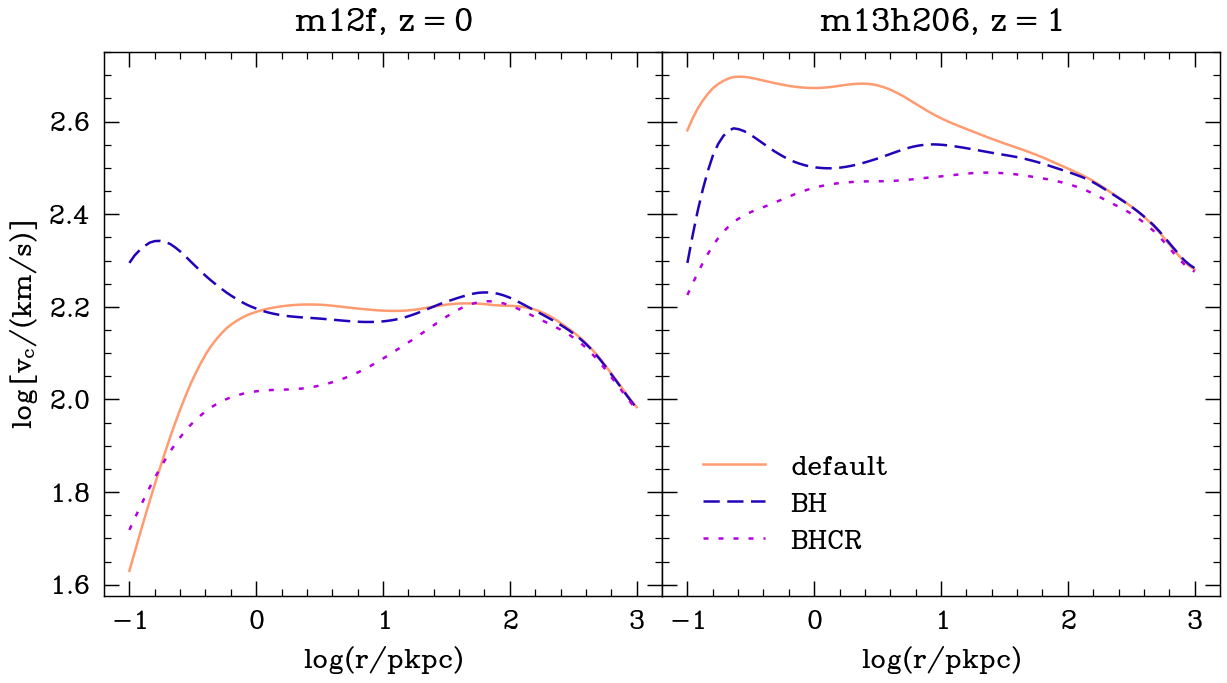

In [8]:
def makevc(sims=['m12f', 'm12q', 'm13h029', 'm13h113', 'm13h206'], fname=None):
    fig, axes = plt.subplots(1, len(sims), sharex=True, sharey=True, gridspec_kw={'wspace': .0, 'hspace':.04}, figsize=[4.8*len(sims),4.8*1], dpi=150, facecolor='w')
    R_min = 10**-1*un.kpc
    R_max = 10**3*un.kpc
    xarr = np.logspace(np.log10(R_min.to(un.kpc).value), np.log10(R_max.to(un.kpc).value), 100) * un.kpc
    for i,sim in enumerate(sims):
            for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
                Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
                axes[i].set_title(f'{sim}, $z={Sim.Redshift:.0f}$')
                axes[i].plot(np.log10(xarr.value), np.log10(Sim.potential.vc(xarr).value), ls, c=COLOR_SCHEME[mi-1], label=model.split('_')[1])
                # axes[i].axvline(np.log10(Sim.potential.get_Rcirc().value), label='$R_{circ}$', c='k')
    axes[1].legend(loc=3)
    for ax in axes: ax.set_xlabel(r'$\log (r/\mathrm{pkpc})$')
    axes[0].set_ylabel(r'$\log \left[ v_c/(\mathrm{km/s}) \right]$')
    if fname: plt.savefig(fname)
makevc(['m12f', 'm13h206'])#, fname='../Paper2Figs/vc_m12f_m13h206.pdf')
                

In [7]:
from astropy import units as un
# res_par[-1].integrate_cooling_flow(R_circ=1*un.kpc, Mdot=res_par[-1].Mdot_avg)
# res_par[-3].integrate_cooling_flow(R_circ=1*un.kpc, Mdot=res_par[-1].Mdot_avg)
# res_par[-2].integrate_cooling_flow(R_circ=1*un.kpc, Mdot=res_par[-1].Mdot_avg)

res_par[2].integrate_cooling_flow(R_circ=10*un.kpc, Mdot=res_par[2].Mdot_avg)
res_par[0].integrate_cooling_flow(R_circ=10*un.kpc, Mdot=res_par[2].Mdot_avg)
res_par[1].integrate_cooling_flow(R_circ=10*un.kpc, Mdot=res_par[2].Mdot_avg)

/work2/08044/tg873432/frontera/tools/cooling_flow/WiersmaCooling.py:40: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


Integrated with log T(R_circ)=6.00, maximum radius reached 11 kpc, stop reason: unbound
Integrated with log T(R_circ)=5.00, maximum radius reached 15 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.50, maximum radius reached 36 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.25, maximum radius reached 301 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.38, maximum radius reached 57 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.31, maximum radius reached 87 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.28, maximum radius reached 135 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.27, maximum radius reached 244 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.26, maximum radius reached 435 kpc, stop reason: max R reached
Integrated with log T(R_circ)=6.00, maximum radius reached 11 kpc, stop reason: unbound
Integrated with log T(R_circ)=5.00, maximum radius reached 16 kpc, stop reason: unbound
Integrated with lo

/work2/08044/tg873432/frontera/tools/cooling_flow/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work2/08044/tg873432/frontera/tools/cooling_flow/WiersmaCooling.py:46: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWa

Integrated with log T(R_circ)=4.12, maximum radius reached 124 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.19, maximum radius reached 146 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.16, maximum radius reached 249 kpc, stop reason: sonic point


/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/work/08044/tg873432/frontera/miniconda3/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in add
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Integrated with log T(R_circ)=4.17, maximum radius reached 425 kpc, stop reason: max R reached


In [8]:
def colormap(k, ax, sim):
    d = getattr(sim, f'cmap_{k}')
    im = ax.pcolormesh(d['X'], d['Y'], d['H'], cmap='Reds', norm=colors.SymLogNorm(linthresh=0.03, vmin=0, vmax=1))
    return im

In [ ]:
pro = res_par[-3].pro
sim = res_par[-3]
rmid = pro['rmid']*pro['Rvir']

fig, axes = plt.subplots(2, 3, sharex=True, sharey=False, gridspec_kw={'wspace': .3, 'hspace':.04}, figsize=[4.8*3.3,4.8*2], dpi=150, facecolor='w')


ylabels = [r'$\log \left< n_H / \mathrm{cm}^{-3} \right>$', 
           profilelabels['T lin'], 
           r'$\log \left< Z / Z_\odot \right>$',
           r'$ \left< \mathcal{M} \right>$',
           r'$\log \left< t_{\mathrm{cool}} / \mathrm{Gyr} \right>$',
           r'$\log \left< t_{\mathrm{cool}} / t_{\mathrm{ff}} \right>$',
          ]

prolabels = ['nH', 'T', 'Z', 'MachNumber', 'tcool', 'tcool_over_tff']

axes[1,1].axhline(np.log10(sim.tHubble), label=r'$t_H$', c='k')
axes[1,1].legend()

axes[0,2].axhline(np.log10(sim.Z2Zsun), label=r'$\left<Z \right>(r<R_{vir})$'+f'={sim.Z2Zsun:.3f} Zsun', c='k')
axes[0,2].legend()

axes[1,1].set_xlabel('$\log (r/\mathrm{pkpc})$')

# Calculate tcool/tff
tff = (np.sqrt(2)*rmid*un.kpc/sim.potential.vc(rmid*un.kpc)).to(un.Gyr).value #tff in units Gyr
pro['tcool_over_tff'] = np.log10( np.power(10, pro['tcool']) / tff )

# Add FIRE-3 h206 no BH curves
for ax, ylabel, prolabel in zip(axes.flatten(), ylabels, prolabels):
    ax.set_xlim(.5,3)
    ax.plot(np.log10(rmid), pro[prolabel], 'k--', label='FIRE-3 h206 (no BHs)')
    ax.set_ylabel(ylabel)
# Add FIRE-3 colormaps
im = colormap('nH', axes[0,0])
colormap('T', axes[0,1])
colormap('MachNumber', axes[1,0])
colormap('tcool', axes[1,1])
colormap('Z', axes[0,2])
for ax in axes.flatten():
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
axes[1,0].set_ylim(-1,1)
axes[1,2].set_ylim(0,2)



# Add cooling flow Rcirc solution curves
res = sim.stalled_solution
res_x = np.log10(res.Rs().to(un.kpc).value)

axes[0,0].plot(res_x, np.log10(res.nHs().to(un.cm**-3).value), label=f'$R_{{circ}}={sim.potential.get_Rcirc().value:.3f}\ \mathrm{{kpc}}, \dot{{M}}={res.Mdot.value:.1f}\ M_\odot/\mathrm{{yr}}$')
axes[0,1].plot(res_x, np.log10(res.Ts().to(un.K).value))
# axes[1,0].plot(res_x, np.log10(res.Ms()))
axes[1,0].plot(res_x, res.Ms())

axes[1,1].plot(res_x, np.log10(res.t_cools().to(un.Gyr).value))
axes[1,2].plot(res_x, np.log10(res.tcool_to_tff()))

# axes[0,0].set_xlim(0.4,3)
axes[0,0].legend()

# Add the colorbar to the figure
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
# cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')

/tmp/ipykernel_95671/1904549905.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


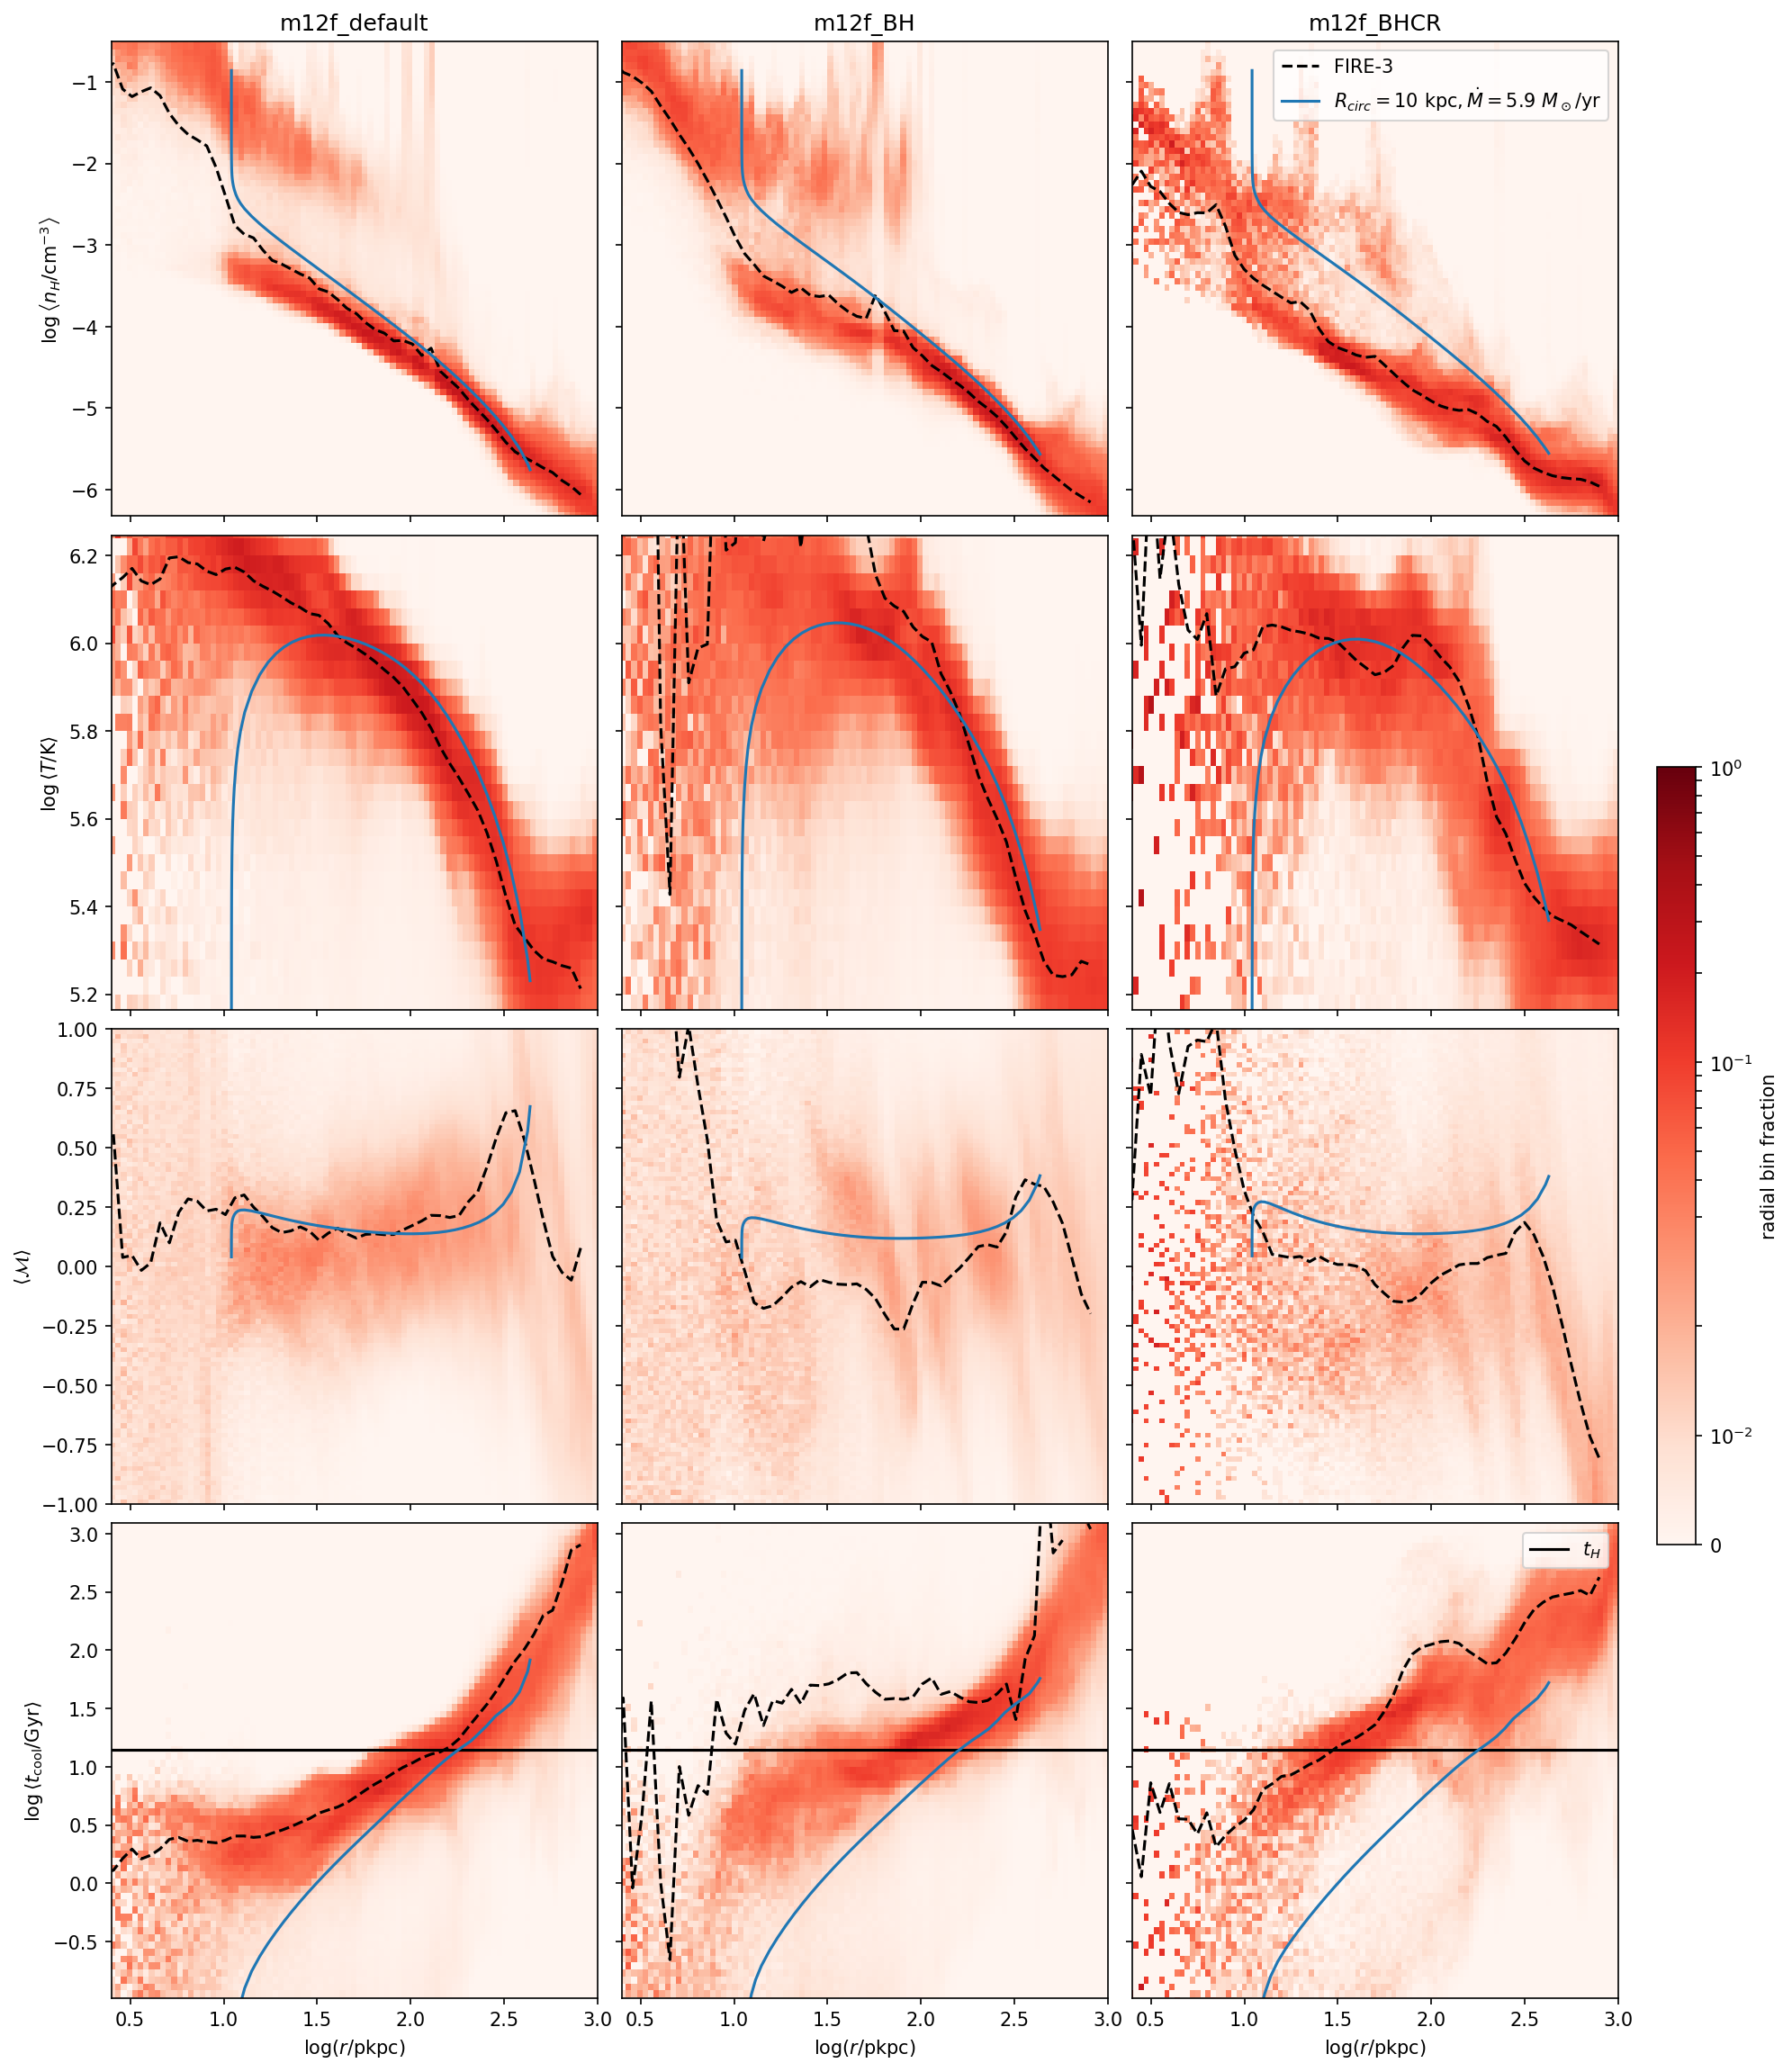

In [10]:
def makecoolingflow(sim='m13h206', fname=None):
    fig, axes = plt.subplots(4, 3, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.04}, figsize=[4.8*3,4.8*4], dpi=150, facecolor='w')

    ylabels = [r'$\log \left< n_H / \mathrm{cm}^{-3} \right>$', 
            profilelabels['T lin'],
            r'$ \left< \mathcal{M} \right>$',
            r'$\log \left< t_{\mathrm{cool}} / \mathrm{Gyr} \right>$'
            ]

    prolabels = ['nH', 'T', 'MachNumber', 'tcool']
    for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
        Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
        pro = Sim.pro
        rmid = pro['rmid']*pro['Rvir']

        axes[3,mi].axhline(np.log10(Sim.tHubble), label=r'$t_H$', c='k')
        if mi==2: axes[3,mi].legend()

        axes[3,mi].set_xlabel('$\log (r/\mathrm{pkpc})$')

        # Add FIRE-3 curves
        for ax, ylabel, prolabel in zip(axes[:,mi], ylabels, prolabels):
            ax.set_xlim(.4,3)
            ax.plot(np.log10(rmid), pro[prolabel], 'k--', label='FIRE-3')
            if mi==0: ax.set_ylabel(ylabel)
            if prolabel=='nH': ax.set_title(model)
        for ax in axes.flatten():
            ax.set_xlim(ax.get_xlim())
            ax.set_ylim(ax.get_ylim())
        axes[2,mi].set_ylim(-1,1)
        # Add FIRE-3 colormaps
        im = colormap('nH', axes[0,mi], Sim)
        colormap('T', axes[1,mi], Sim)
        colormap('MachNumber', axes[2,mi], Sim)
        colormap('tcool', axes[3,mi], Sim)


        # Add cooling flow Rcirc solution curves
        res = Sim.stalled_solution
        res_x = np.log10(res.Rs().to(un.kpc).value)

        axes[0,mi].plot(res_x, np.log10(res.nHs().to(un.cm**-3).value), label=f'$R_{{circ}}=10\ \mathrm{{kpc}}, \dot{{M}}={res.Mdot.value:.1f}\ M_\odot/\mathrm{{yr}}$')
        axes[1,mi].plot(res_x, np.log10(res.Ts().to(un.K).value))
        axes[2,mi].plot(res_x, res.Ms())
        axes[3,mi].plot(res_x, np.log10(res.t_cools().to(un.Gyr).value))

        # axes[0,mi].set_xlim(0.4,3)
    axes[0,2].legend()

    # Add the colorbar to the figure
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.3]) # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    cbar.set_label('radial bin fraction')
    fig.tight_layout()
    if fname: plt.savefig(fname, bbox_inches='tight')
makecoolingflow('m12f', fname='../Paper2Figs/coolingflow_m12f_z0.pdf')
# makecoolingflow(fname='../Paper2Figs/coolingflow_m13h206_z1.pdf')

In [19]:
def makeprofiles(sims=['m12f', 'm12q', 'm13h029', 'm13h113', 'm13h206'], 
                 fname=None,
                 prolabels = ['nH', 'T', 'P_th'],
                 ylabels = [profilelabels['nH lin'], profilelabels['T lin'], profilelabels['P_th lin']]):
    fig, axes = plt.subplots(len(sims), len(prolabels), sharex=True, sharey='col', gridspec_kw={'wspace': .15, 'hspace':.05}, figsize=[4.8*len(prolabels),4.8*len(sims)], dpi=150)
    axes = np.reshape(axes, (len(sims), len(prolabels)))
    for i,sim in enumerate(sims):
        axes[i,0].set_ylabel(sim)
        for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
            Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
            for j, (ylabel, prolabel) in enumerate(zip(ylabels, prolabels)):
                axes[i,j].plot(np.log10(Sim.pro['rmid']), Sim.pro[prolabel], ls, c=COLOR_SCHEME[mi-1], label=model.split('_')[1])
                if prolabel=='P_th' and len(Sim.pro['P_CR'])>0:
                    axes[i,j].plot(np.log10(Sim.pro['rmid']), Sim.pro['P_CR'], '-.', c=COLOR_SCHEME[mi-1], label=model.split('_')[1]+' $P_{CR}$')
                axes[0,j].set_title(ylabel)

    for ax in axes[-1]: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[0,-1].legend()

    axes[0,0].set_xlim(left=np.log10(0.05))

    if fname: plt.savefig(fname)

In [73]:
def makeZprofile(sims=['m12f', 'm12q', 'm13h029', 'm13h113', 'm13h206'], 
                 fname=None,
                 prolabels = ['Z'],
                 ylabels = [profilelabels['Z lin']]):
    fig, axes = plt.subplots(1, len(sims), sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*len(sims),4.8*1], dpi=150)
    for i,sim in enumerate(sims):
        axes[i].set_title(sim)
        for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
            Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
            for j, (ylabel, prolabel) in enumerate(zip(ylabels, prolabels)):
                axes[i].plot(np.log10(Sim.pro['rmid']), Sim.pro[prolabel], ls, c=COLOR_SCHEME[mi-1], label=model.split('_')[1])
                axes[0].set_ylabel(ylabel)
            axes[i].axhline(np.log10(Sim.part[0]['Z2Zsun']), c=COLOR_SCHEME[mi-1], ls=ls, lw=1)
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[-1].legend()

    if fname: plt.savefig(fname)

In [98]:
def makeMdotprofile(sims=['m12f', 'm12q', 'm13h029', 'm13h113', 'm13h206'], 
                 fname=None):
    fig, axes = plt.subplots(1, len(sims), sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.15}, figsize=[4.8*len(sims),4.8*1], dpi=150)
    for i,sim in enumerate(sims):
        axes[i].set_title(sim)
        for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
            Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
            axes[i].plot(np.log10(Sim.Mdot_profile[0]/Sim.pro['Rvir']), Sim.Mdot_profile[1], ls, c=COLOR_SCHEME[mi-1], label=model.split('_')[1])
            axes[0].set_ylabel('$\dot{{M}}/(M_\odot/\mathrm{{yr}})$')
            axes[i].axhline(Sim.Mdot_avg.value, c=COLOR_SCHEME[mi-1], ls=ls, lw=1)
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[-1].legend()
    axes[0].set_yscale('symlog')

    if fname: plt.savefig(fname)

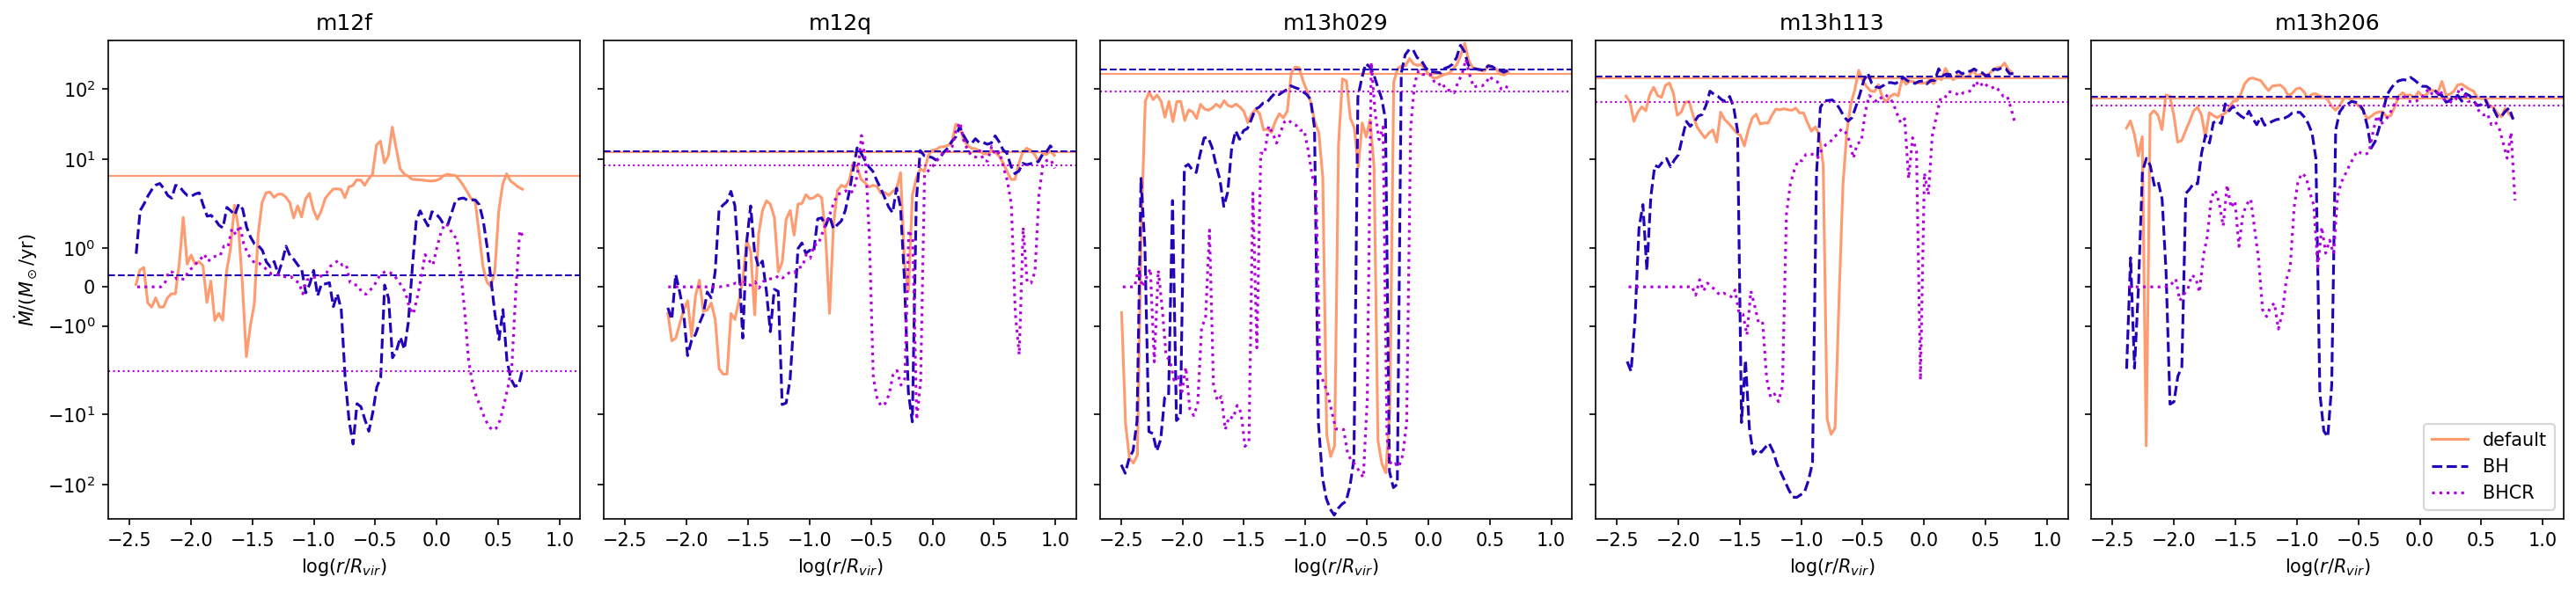

In [99]:
makeMdotprofile(fname='../Paper2Figs/Mdotprofiles.pdf')

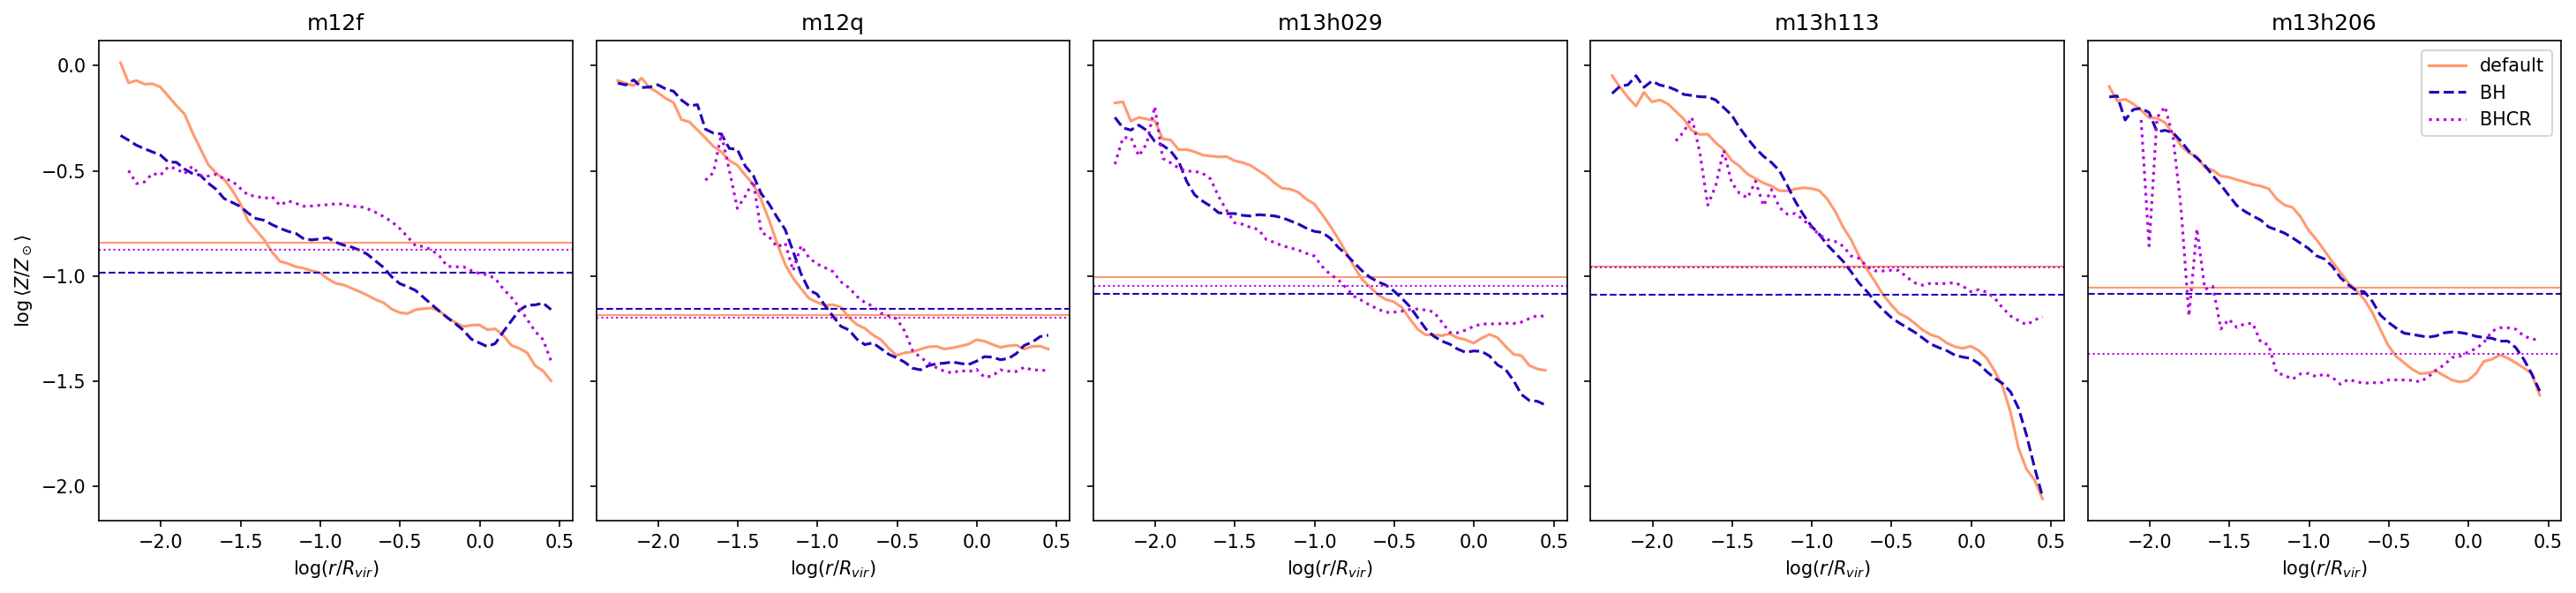

In [75]:
makeZprofile(fname='../Paper2Figs/Zprofiles.pdf')

In [24]:
plt.rcParams.update({'font.size': 15})

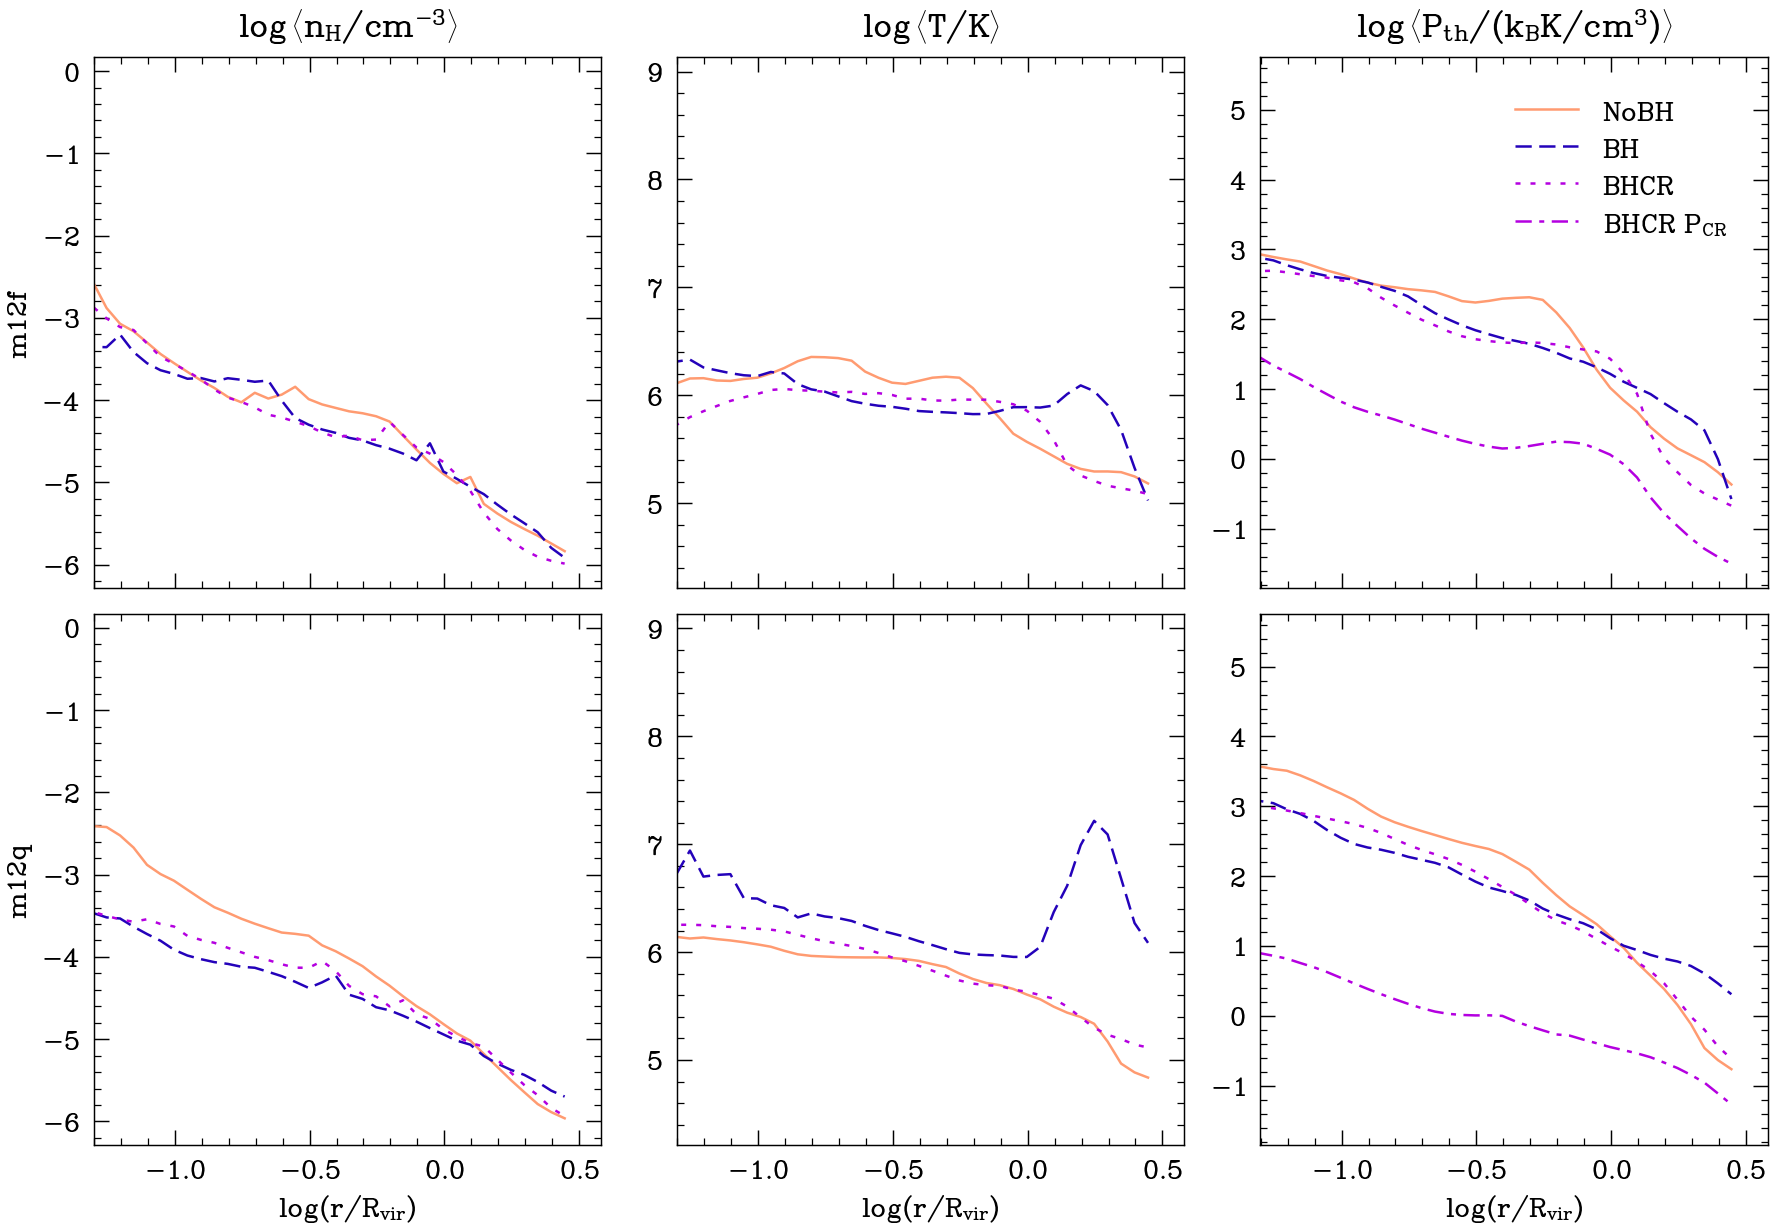

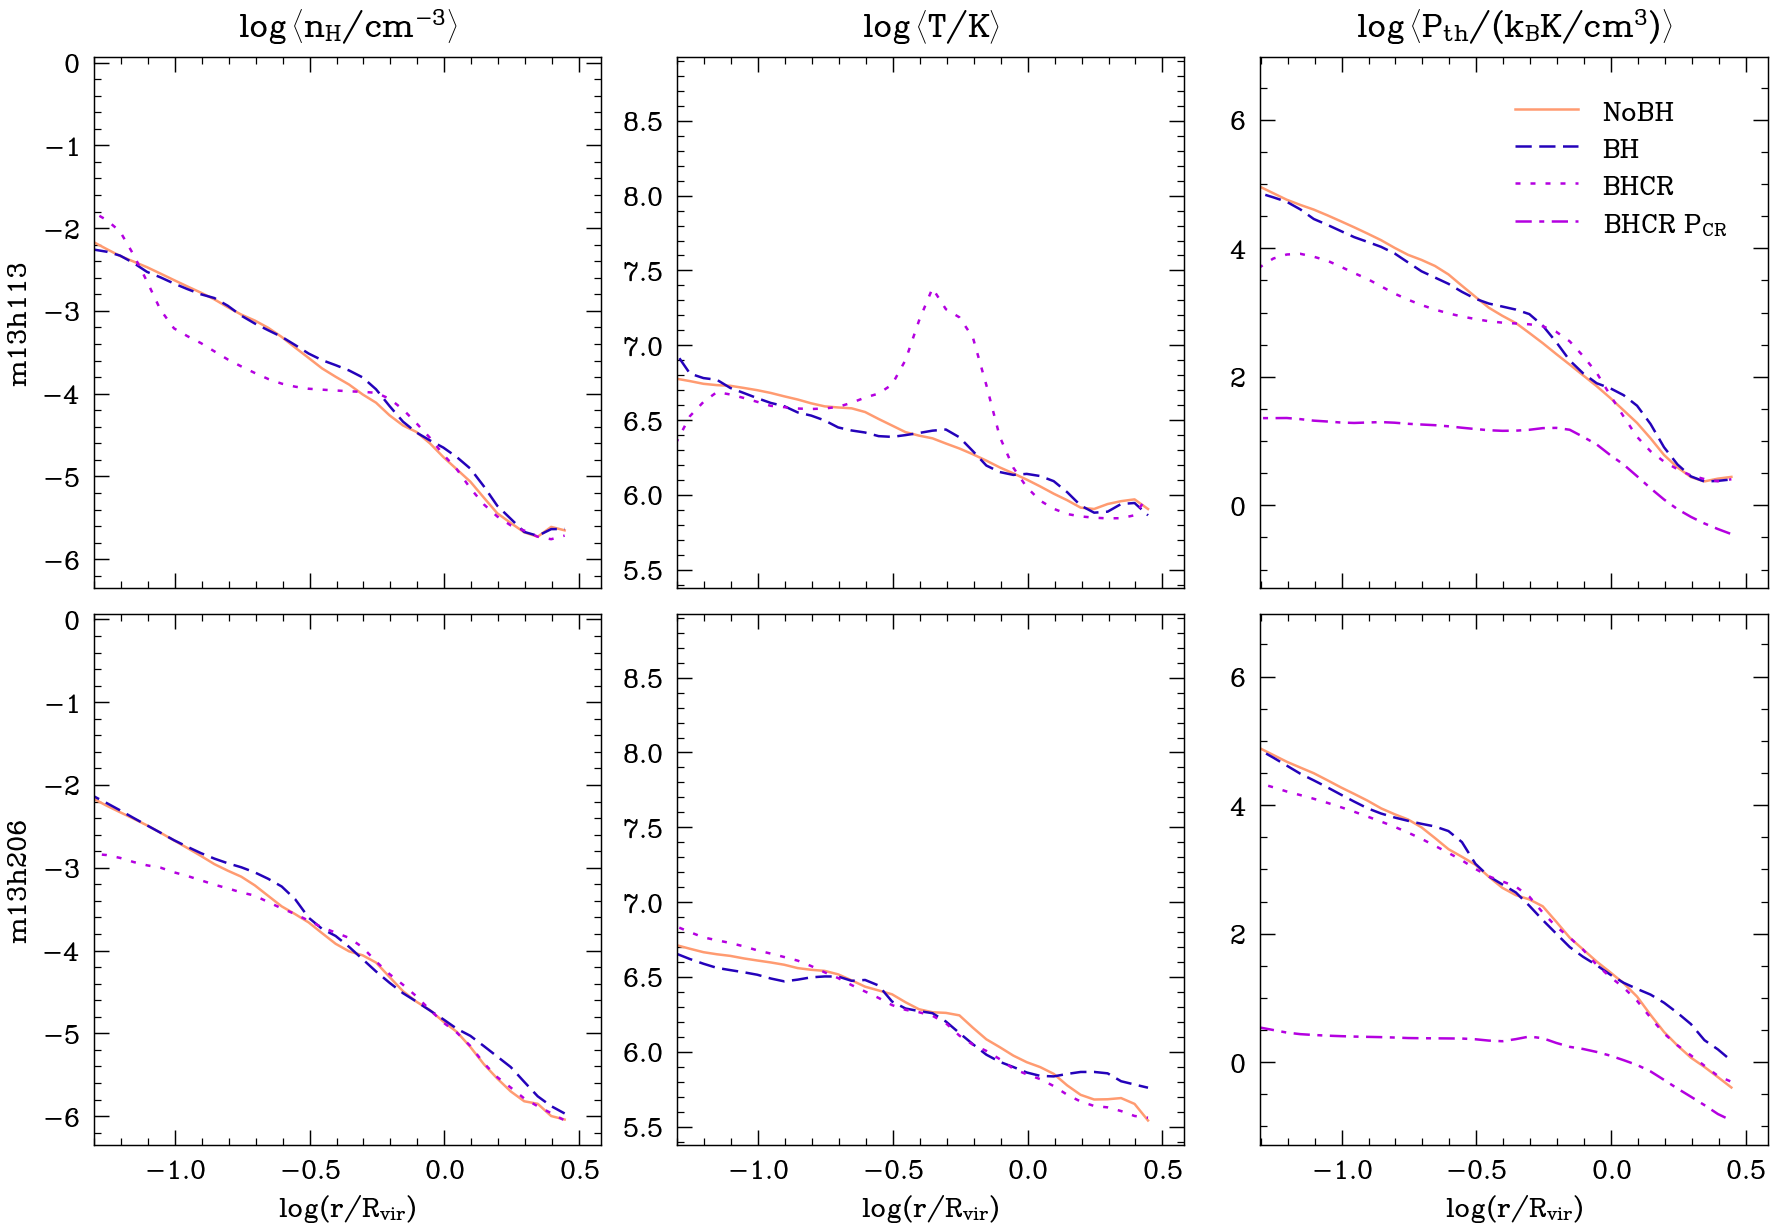

In [20]:
makeprofiles(['m12f', 'm12q'], '../Paper2Figs/m12profiles_z0p3.pdf')
makeprofiles(['m13h113', 'm13h206'], '../Paper2Figs/m13profiles_z0p3.pdf')

In [5]:
eagle = np.genfromtxt('davies20.csv', delimiter=',', skip_header=2, usecols=(0,1))
tng = np.genfromtxt('davies20.csv', delimiter=',', skip_header=2, usecols=(2,3))

In [6]:
def fbary_model(sims, particle_types_num=[0,4], particle_types=[0,1,2,4]):
    fb_05 = []
    fb_1 = []
    fb_2 = []
    fb_3 = []

    Mvir = []
    Rvir = []
    colors = []
    for i,sim in enumerate(sims):
        for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
            Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
            cachemodel = cache[PaperSimNames[model]]
            cosmological_baryon_budget = cachemodel['Omega_Baryon'] / cachemodel['Omega_Matter']
            print(model, cosmological_baryon_budget)
            profile = Sim.pro

            totmass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types], axis=0 )
            nummass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types_num], axis=0 )
            with np.errstate(all='ignore'): fbarr = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
            print()
            fb_05.append(fbarr[39])
            fb_1.append(fbarr[45])
            fb_2.append(fbarr[51])
            fb_3.append(fbarr[54])
#             Mvir.append(profile['Mvir'][()])
#             Rvir.append(profile['Rvir'][()])
            Mvir.append(Sim.M200c)
            Rvir.append(Sim.R200c)
            colors.append(COLOR_SCHEME[mi-1])
    return Mvir, Rvir, fb_05, fb_1, fb_2, fb_3, colors

def makebaryonfraction(sims=['m12f', 'm12q', 'm13h113', 'm13h206'], fname=None):
    flabel='b'
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*2,4.8*2], dpi=100, facecolor='w')

    Mvir, Rvir, fb_05, fb_1, fb_2, fb_3, colors = fbary_model(sims)
    
    # Make legend
    axes[0,1].scatter([],[], c=colors[0], label='NoBH')
    axes[0,1].scatter([],[], c=colors[1], label='BH')
    axes[0,1].scatter([],[], c=colors[2], label='BHCR')
    axes[0,1].legend(loc=4)
    
    colors = np.array(colors)
    axes[0,0].scatter(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)], label='$3 R_{vir}$')
    axes[0,1].scatter(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)], label='$2 R_{vir}$')
    axes[1,0].scatter(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)])#, label='$1 R_{vir}$')
    axes[1,1].scatter(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)], label='BHs')
    
#     # Davies+20
#     axes[1,0].plot(10**eagle[:,0], eagle[:,1]*(0.04825/0.307), label='EAGLE')
#     axes[1,0].plot(10**tng[:,0], tng[:,1]*(0.0486/0.310), label='TNG-100')
#     axes[1,0].legend()
    
    # Davies+20
    axes[1,0].plot(10**eagle[:,0], eagle[:,1], label='EAGLE')
    axes[1,0].plot(10**tng[:,0], tng[:,1], label='TNG-100')
    axes[1,0].legend(loc=4)

    axes[0,0].text(1e12, 0.9, '$3 R_{vir}$')
    axes[0,1].text(1e12, 0.9, '$2 R_{vir}$')
    axes[1,0].text(1e12, 0.9, '$1 R_{vir}$')
    axes[1,1].text(1e12, 0.9, '$0.5 R_{vir}$')
    plt.xscale('log')

    # plt.xlabel(r'$\log (r/R_{vir})$')
    fig.text(0.5, 0.065, '$M_{200c}/M_\odot$', ha='center')
    fig.text(0.045, 0.5, f'$f_{{{flabel}}}/(\Omega_b / \Omega_m)$', va='center', rotation='vertical')

    if fname: plt.savefig(fname)

In [48]:
def fbary_model(sims, particle_types_num=[0], particle_types=[0,1,2,4]):
    fb_05 = []
    fb_1 = []
    fb_2 = []
    fb_3 = []

    Mvir = []
    Rvir = []
    colors = []
    for i,sim in enumerate(sims):
        for mi, (model,ls) in enumerate(zip([f'{sim}_NoBH', f'{sim}_BH', f'{sim}_BHCR'], ['-', '--',':'])):
            Sim = res_par[ sorted(PaperSimNames.keys()).index(model) ]
            cachemodel = cache[PaperSimNames[model]]
            cosmological_baryon_budget = cachemodel['Omega_Baryon'] / cachemodel['Omega_Matter']
            print(model, cosmological_baryon_budget)
            profile = Sim.pro

            totmass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types], axis=0 )
            nummass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types_num], axis=0 )
            with np.errstate(all='ignore'): fbarr = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
            print()
            fb_05.append(fbarr[39])
            fb_1.append(fbarr[45])
            fb_2.append(fbarr[51])
            fb_3.append(fbarr[54])
#             Mvir.append(profile['Mvir'][()])
#             Rvir.append(profile['Rvir'][()])
            Mvir.append(Sim.M200c)
            Rvir.append(Sim.R200c)
            colors.append(COLOR_SCHEME[mi-1])
    return Mvir, Rvir, fb_05, fb_1, fb_2, fb_3, colors

def makebaryonfraction(sims=['m12f', 'm12q', 'm13h113', 'm13h206'], fname=None):
    flabel='b'
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*2,4.8*2], dpi=100, facecolor='w')

    Mvir, Rvir, fb_05, fb_1, fb_2, fb_3, colors = fbary_model(sims)
    
    # Make legend
    axes[0,1].scatter([],[], c=colors[0], label='NoBH')
    axes[0,1].scatter([],[], c=colors[1], label='BH')
    axes[0,1].scatter([],[], c=colors[2], label='BHCR')
    axes[0,1].legend(loc=4)
    
    colors = np.array(colors)
    axes[0,0].scatter(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)], label='$3 R_{vir}$')
    axes[0,1].scatter(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)], label='$2 R_{vir}$')
    axes[1,0].scatter(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)])#, label='$1 R_{vir}$')
    axes[1,1].scatter(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], c=colors[np.argsort(Mvir)], label='BHs')
    
#     # Davies+20
#     axes[1,0].plot(10**eagle[:,0], eagle[:,1]*(0.04825/0.307), label='EAGLE')
#     axes[1,0].plot(10**tng[:,0], tng[:,1]*(0.0486/0.310), label='TNG-100')
#     axes[1,0].legend()
    
    # Davies+20
    axes[1,0].plot(10**eagle[:,0], eagle[:,1], label='EAGLE')
    axes[1,0].plot(10**tng[:,0], tng[:,1], label='TNG-100')
    axes[1,0].legend(loc=4)

    axes[0,0].text(1e12, 0.9, '$3 R_{vir}$')
    axes[0,1].text(1e12, 0.9, '$2 R_{vir}$')
    axes[1,0].text(1e12, 0.9, '$1 R_{vir}$')
    axes[1,1].text(1e12, 0.9, '$0.5 R_{vir}$')
    plt.xscale('log')

    # plt.xlabel(r'$\log (r/R_{vir})$')
    fig.text(0.5, 0.065, '$M_{200c}/M_\odot$', ha='center')
    fig.text(0.045, 0.5, f'$f_{{{flabel}}}/(\Omega_b / \Omega_m)$', va='center', rotation='vertical')

    if fname: plt.savefig(fname)

m12f_NoBH 0.16727941176470587

m12f_BH 0.16727941176470587

m12f_BHCR 0.16727941176470587

m12q_NoBH 0.16727941176470587

m12q_BH 0.16727941176470587

m12q_BHCR 0.16727941176470587

m13h113_NoBH 0.15733247005503398

m13h113_BH 0.15733247005503398

m13h113_BHCR 0.15733247005503398

m13h206_NoBH 0.15733247005503398

m13h206_BH 0.15733247005503398

m13h206_BHCR 0.15733247005503398



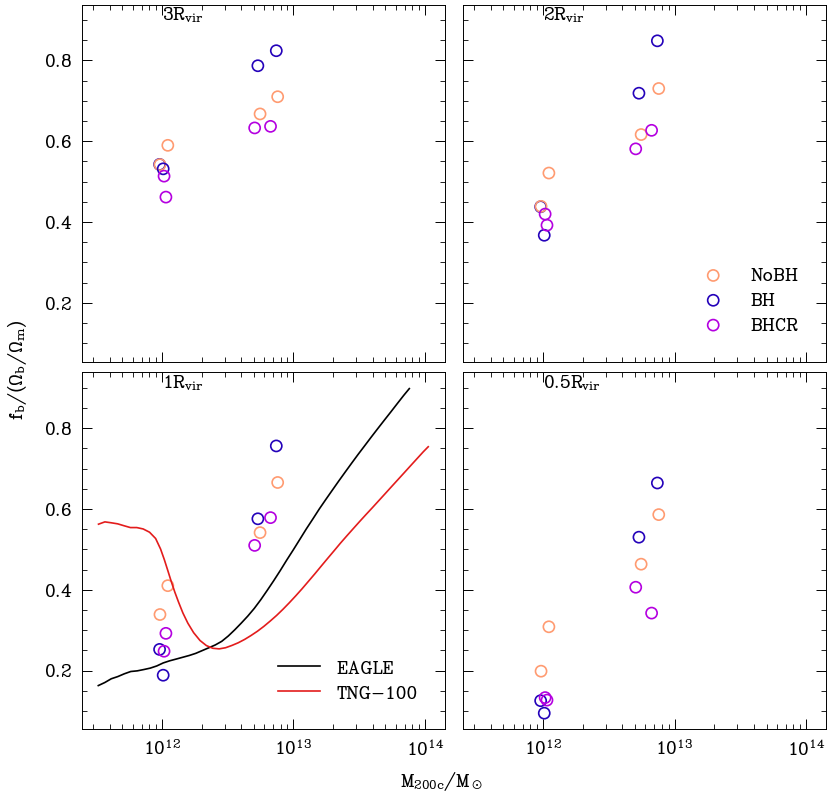

In [12]:
makebaryonfraction()#fname='../Paper2Figs/baryonfraction_z0p3.pdf')